In [1]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklego.linear_model import LowessRegression

### Reading in from external source

In [2]:
data = pd.read_csv("../Dataset/Leidinger2016/data.csv", index_col=0)
metadata = pd.read_csv("../Dataset/Leidinger2016/metadata.csv", index_col=0)

In [3]:
data

,427_73,427_203,427_6,427_113,427_204,427_72,427_114,CBC-Std._PAX,427_74,427_144,...,427_32,427_130,427_195,427_43,427_132,427_21,427_51,427_194,427_22,427_131
mirna,,,,,,,,,,,,,,,,,,,,,
hsa-let-7d-3p,15.932603,15.223523,16.248352,22.413015,13.645375,14.738012,22.596233,22.888973,15.866733,24.288934,...,15.509471,20.697998,15.889463,15.685995,19.293326,25.930607,14.996039,15.952217,24.905330,19.285037
hsa-miR-1274A,10.737571,10.574143,11.331379,11.572388,10.042076,10.144483,12.356872,10.705495,9.667815,13.633111,...,10.679353,13.142619,10.238733,11.271985,15.254062,12.772054,10.690352,11.481045,12.959969,13.640983
hsa-miR-130b-5p,20.781680,22.014845,21.718082,23.709886,19.100417,21.827675,25.048847,36.433345,21.689067,27.451811,...,20.099207,25.060506,21.664748,20.498594,26.540182,26.644933,19.678436,21.797062,25.517612,26.471666
hsa-miR-18b-3p,22.427460,25.036337,25.034230,30.959039,20.030237,21.940433,23.854875,NaN,22.811107,NaN,...,22.284950,23.662515,26.152364,21.575217,23.234337,24.539601,20.642805,26.419264,NaN,24.594952
hsa-mir-374a-3p,NaN,35.488431,28.069303,NaN,NaN,26.889067,NaN,NaN,NaN,NaN,...,25.392850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-miR-525-5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa-miR-499a-5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.002006,NaN,NaN,NaN,27.854501,NaN,NaN,NaN
hsa-miR-425-5p,11.527253,11.564897,11.373714,12.954788,10.769821,11.765464,15.327691,23.278471,12.285083,20.455999,...,10.468457,16.415906,11.180775,11.154117,18.681152,16.498625,9.863937,11.245421,16.345123,19.150788


In [4]:
metadata

,Class,extraction
CBCID,,
427_2,0 (Ctrl),miRNeasy
427_3,0 (Ctrl),miRNeasy
427_7,0 (Ctrl),miRNeasy
427_1,0 (Ctrl),miRNeasy
427_10,0 (Ctrl),miRNeasy
...,...,...
427_194,3 (COPD),miRNeasy
427_195,3 (COPD),miRNeasy
427_196,3 (COPD),miRNeasy


In [5]:
data2 = pd.concat([data.iloc[:].transpose(), metadata], axis=1)

In [6]:
data2 = data2.dropna(subset=["Class"])

In [7]:
data2

,hsa-let-7d-3p,hsa-miR-1274A,hsa-miR-130b-5p,hsa-miR-18b-3p,hsa-mir-374a-3p,hsa-miR-518e-5p,hsa-miR-595,hsa-miR-634,hsa-miR-675-5p,hsa-miR-942-5p,...,hsa-miR-98-5p,hsa-miR-744-5p,hsa-miR-598-3p,hsa-miR-525-5p,hsa-miR-499a-5p,hsa-miR-425-5p,hsa-miR-320d,hsa-miR-1471,Class,extraction
427_73,15.932603,10.737571,20.781680,22.427460,NaN,NaN,NaN,NaN,NaN,8.608420,...,21.479600,14.765223,18.852307,NaN,NaN,11.527253,13.790253,NaN,2 (LCa),miRNeasy
427_203,15.223523,10.574143,22.014845,25.036337,35.488431,NaN,NaN,NaN,NaN,9.110362,...,20.942969,15.233210,17.840421,NaN,NaN,11.564897,13.822623,NaN,3 (COPD),miRNeasy
427_6,16.248352,11.331379,21.718082,25.034230,28.069303,NaN,NaN,NaN,NaN,9.710889,...,19.022369,15.480556,17.553957,NaN,NaN,11.373714,11.482754,NaN,0 (Ctrl),miRNeasy
427_113,22.413015,11.572388,23.709886,30.959039,NaN,NaN,NaN,NaN,NaN,10.937889,...,NaN,16.846389,22.740004,NaN,NaN,12.954788,14.114211,NaN,2 (LCa),PAXGene Blood
427_204,13.645375,10.042076,19.100417,20.030237,NaN,NaN,NaN,NaN,NaN,8.237714,...,20.796972,14.728296,17.985389,NaN,NaN,10.769821,15.230916,NaN,3 (COPD),miRNeasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427_21,25.930607,12.772054,26.644933,24.539601,NaN,NaN,NaN,NaN,NaN,12.575656,...,23.968691,18.143339,22.656183,NaN,NaN,16.498625,23.065737,NaN,0 (Ctrl),PAXGene Blood
427_51,14.996039,10.690352,19.678436,20.642805,NaN,NaN,NaN,NaN,NaN,8.241445,...,20.385480,13.935923,17.096224,NaN,27.854501,9.863937,15.176894,NaN,2 (LCa),miRNeasy
427_194,15.952217,11.481045,21.797062,26.419264,NaN,NaN,NaN,NaN,NaN,8.690464,...,20.412882,14.900462,17.517965,NaN,NaN,11.245421,15.470059,NaN,3 (COPD),miRNeasy
427_22,24.905330,12.959969,25.517612,NaN,NaN,NaN,NaN,NaN,NaN,12.872868,...,22.758393,18.155782,20.193854,NaN,NaN,16.345123,19.442010,NaN,0 (Ctrl),PAXGene Blood


In [8]:
table = data2.iloc[:, :-2]
mirnas = table.columns

In [9]:
table

,hsa-let-7d-3p,hsa-miR-1274A,hsa-miR-130b-5p,hsa-miR-18b-3p,hsa-mir-374a-3p,hsa-miR-518e-5p,hsa-miR-595,hsa-miR-634,hsa-miR-675-5p,hsa-miR-942-5p,...,hsa-miR-320c,hsa-miR-1299,hsa-miR-98-5p,hsa-miR-744-5p,hsa-miR-598-3p,hsa-miR-525-5p,hsa-miR-499a-5p,hsa-miR-425-5p,hsa-miR-320d,hsa-miR-1471
427_73,15.932603,10.737571,20.781680,22.427460,NaN,NaN,NaN,NaN,NaN,8.608420,...,12.054734,18.381541,21.479600,14.765223,18.852307,NaN,NaN,11.527253,13.790253,NaN
427_203,15.223523,10.574143,22.014845,25.036337,35.488431,NaN,NaN,NaN,NaN,9.110362,...,10.501013,26.472544,20.942969,15.233210,17.840421,NaN,NaN,11.564897,13.822623,NaN
427_6,16.248352,11.331379,21.718082,25.034230,28.069303,NaN,NaN,NaN,NaN,9.710889,...,11.183694,19.951407,19.022369,15.480556,17.553957,NaN,NaN,11.373714,11.482754,NaN
427_113,22.413015,11.572388,23.709886,30.959039,NaN,NaN,NaN,NaN,NaN,10.937889,...,11.187046,18.126288,NaN,16.846389,22.740004,NaN,NaN,12.954788,14.114211,NaN
427_204,13.645375,10.042076,19.100417,20.030237,NaN,NaN,NaN,NaN,NaN,8.237714,...,11.567222,31.446154,20.796972,14.728296,17.985389,NaN,NaN,10.769821,15.230916,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427_21,25.930607,12.772054,26.644933,24.539601,NaN,NaN,NaN,NaN,NaN,12.575656,...,13.037589,23.646209,23.968691,18.143339,22.656183,NaN,NaN,16.498625,23.065737,NaN
427_51,14.996039,10.690352,19.678436,20.642805,NaN,NaN,NaN,NaN,NaN,8.241445,...,11.235713,17.736150,20.385480,13.935923,17.096224,NaN,27.854501,9.863937,15.176894,NaN
427_194,15.952217,11.481045,21.797062,26.419264,NaN,NaN,NaN,NaN,NaN,8.690464,...,13.371917,22.308426,20.412882,14.900462,17.517965,NaN,NaN,11.245421,15.470059,NaN
427_22,24.905330,12.959969,25.517612,NaN,NaN,NaN,NaN,NaN,NaN,12.872868,...,11.775947,23.305037,22.758393,18.155782,20.193854,NaN,NaN,16.345123,19.442010,NaN


In [10]:
mirnas

Index(['hsa-let-7d-3p', 'hsa-miR-1274A', 'hsa-miR-130b-5p', 'hsa-miR-18b-3p',
       'hsa-mir-374a-3p', 'hsa-miR-518e-5p', 'hsa-miR-595', 'hsa-miR-634',
       'hsa-miR-675-5p', 'hsa-miR-942-5p',
       ...
       'hsa-miR-320c', 'hsa-miR-1299', 'hsa-miR-98-5p', 'hsa-miR-744-5p',
       'hsa-miR-598-3p', 'hsa-miR-525-5p', 'hsa-miR-499a-5p', 'hsa-miR-425-5p',
       'hsa-miR-320d', 'hsa-miR-1471'],
      dtype='object', length=241)

### Seperate case and controls

In [11]:
sick = data2["Class"] == "2 (LCa)"
controls = 1 - sick

In [12]:
sum(controls)

46

### Drop NAN

In [13]:
table = table.fillna(table.max().max())

### T-test

In [14]:
X = table

In [15]:
X.columns

Index(['hsa-let-7d-3p', 'hsa-miR-1274A', 'hsa-miR-130b-5p', 'hsa-miR-18b-3p',
       'hsa-mir-374a-3p', 'hsa-miR-518e-5p', 'hsa-miR-595', 'hsa-miR-634',
       'hsa-miR-675-5p', 'hsa-miR-942-5p',
       ...
       'hsa-miR-320c', 'hsa-miR-1299', 'hsa-miR-98-5p', 'hsa-miR-744-5p',
       'hsa-miR-598-3p', 'hsa-miR-525-5p', 'hsa-miR-499a-5p', 'hsa-miR-425-5p',
       'hsa-miR-320d', 'hsa-miR-1471'],
      dtype='object', length=241)

In [16]:
X_healthy, X_cancer = X[controls == 1], X[sick == 1]

In [17]:
results = ttest_ind(X_healthy, X_cancer).pvalue

In [18]:
lowest, pvalues = np.argsort(results)[:5], np.sort(results)[:5]

In [19]:
mirnas[lowest], pvalues

(Index(['hsa-miR-452-3p', 'hsa-miR-1252-5p', 'hsa-miR-525-5p', 'cel-miR-39-3p',
        'hsa-miR-767-3p'],
       dtype='object'),
 array([9.21371079e-19, 9.21371079e-19, 9.21371079e-19, 9.21371079e-19,
        9.21371079e-19]))

### F-test

In [20]:
t3 = table

In [21]:
f, p = f_classif(t3, sick)

In [22]:
np.mean(p)

0.2011752391308669

### ANOVA

In [23]:
t3

,hsa-let-7d-3p,hsa-miR-1274A,hsa-miR-130b-5p,hsa-miR-18b-3p,hsa-mir-374a-3p,hsa-miR-518e-5p,hsa-miR-595,hsa-miR-634,hsa-miR-675-5p,hsa-miR-942-5p,...,hsa-miR-320c,hsa-miR-1299,hsa-miR-98-5p,hsa-miR-744-5p,hsa-miR-598-3p,hsa-miR-525-5p,hsa-miR-499a-5p,hsa-miR-425-5p,hsa-miR-320d,hsa-miR-1471
427_73,15.932603,10.737571,20.781680,22.427460,38.204715,38.204715,38.204715,38.204715,38.204715,8.608420,...,12.054734,18.381541,21.479600,14.765223,18.852307,38.204715,38.204715,11.527253,13.790253,38.204715
427_203,15.223523,10.574143,22.014845,25.036337,35.488431,38.204715,38.204715,38.204715,38.204715,9.110362,...,10.501013,26.472544,20.942969,15.233210,17.840421,38.204715,38.204715,11.564897,13.822623,38.204715
427_6,16.248352,11.331379,21.718082,25.034230,28.069303,38.204715,38.204715,38.204715,38.204715,9.710889,...,11.183694,19.951407,19.022369,15.480556,17.553957,38.204715,38.204715,11.373714,11.482754,38.204715
427_113,22.413015,11.572388,23.709886,30.959039,38.204715,38.204715,38.204715,38.204715,38.204715,10.937889,...,11.187046,18.126288,38.204715,16.846389,22.740004,38.204715,38.204715,12.954788,14.114211,38.204715
427_204,13.645375,10.042076,19.100417,20.030237,38.204715,38.204715,38.204715,38.204715,38.204715,8.237714,...,11.567222,31.446154,20.796972,14.728296,17.985389,38.204715,38.204715,10.769821,15.230916,38.204715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427_21,25.930607,12.772054,26.644933,24.539601,38.204715,38.204715,38.204715,38.204715,38.204715,12.575656,...,13.037589,23.646209,23.968691,18.143339,22.656183,38.204715,38.204715,16.498625,23.065737,38.204715
427_51,14.996039,10.690352,19.678436,20.642805,38.204715,38.204715,38.204715,38.204715,38.204715,8.241445,...,11.235713,17.736150,20.385480,13.935923,17.096224,38.204715,27.854501,9.863937,15.176894,38.204715
427_194,15.952217,11.481045,21.797062,26.419264,38.204715,38.204715,38.204715,38.204715,38.204715,8.690464,...,13.371917,22.308426,20.412882,14.900462,17.517965,38.204715,38.204715,11.245421,15.470059,38.204715
427_22,24.905330,12.959969,25.517612,38.204715,38.204715,38.204715,38.204715,38.204715,38.204715,12.872868,...,11.775947,23.305037,22.758393,18.155782,20.193854,38.204715,38.204715,16.345123,19.442010,38.204715


In [24]:
X = np.array(sick).reshape(-1, 1)

In [25]:
linreg = LinearRegression()
linreg.fit(X, t3)

LinearRegression()

In [26]:
fitted = linreg.predict(X)
explained_variance_score(t3, fitted)

0.1063525793006118

### Mean-variance-plot

In [27]:
np.mean(table)

hsa-let-7d-3p      18.720035
hsa-miR-1274A      11.569191
hsa-miR-130b-5p    23.045338
hsa-miR-18b-3p     25.378931
hsa-mir-374a-3p    36.238190
                     ...    
hsa-miR-525-5p     38.204715
hsa-miR-499a-5p    35.772462
hsa-miR-425-5p     13.583900
hsa-miR-320d       19.192923
hsa-miR-1471       38.166583
Length: 241, dtype: float64

In [28]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [29]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

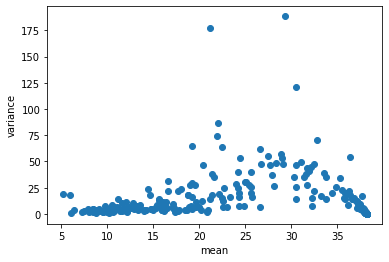

In [30]:
mean_variance_plot(table)

### Log transformation

In [31]:
log_table = table #np.log2(table)

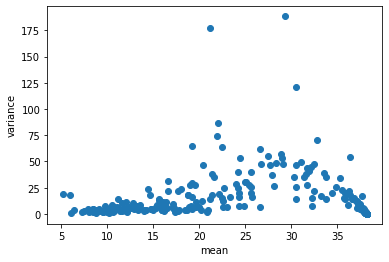

In [32]:
mean_variance_plot(log_table)

### Remove mean

In [33]:
log_table = table
norm_log_table = log_table - np.mean(log_table)
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

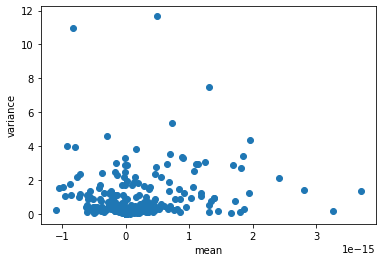

In [34]:
mean_variance_plot(norm_log_table)

### PCA

In [35]:
pca = decomposition.PCA(n_components=10)

In [36]:
pca.fit(norm_log_table)

PCA(n_components=10)

In [37]:
pca.explained_variance_ratio_

array([0.44161885, 0.0544275 , 0.04052915, 0.03123651, 0.03061332,
       0.0238692 , 0.01992795, 0.01956578, 0.01754609, 0.01594461])

In [38]:
components = pca.transform(norm_log_table)

In [39]:
components.shape

(120, 10)

In [40]:
sum(controls)

46

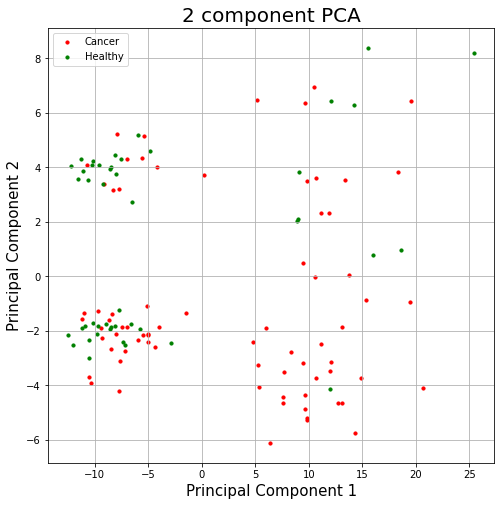

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [42]:
components2 = components[components[:,0] < 20, :]
controls2 = controls[components[:,0] < 20]

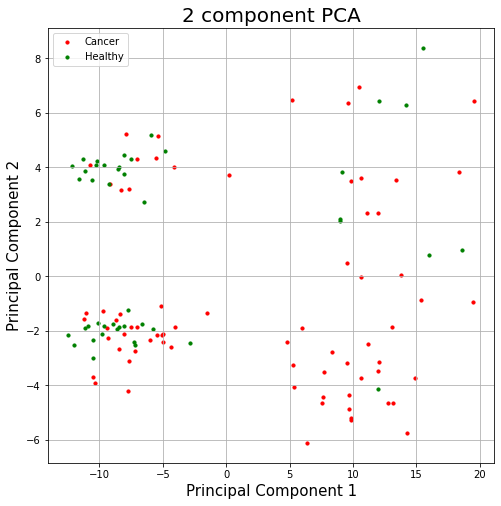

In [43]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components2[controls2 == False, 0], components2[controls2 == False, 1], c = 'r', s = 10)
ax.scatter(components2[controls2 == True, 0], components2[controls2 == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Logistic Regression

In [44]:
X_train, X_test, y_train, y_test = train_test_split(norm_log_table, controls, test_size=0.33, random_state=42)

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


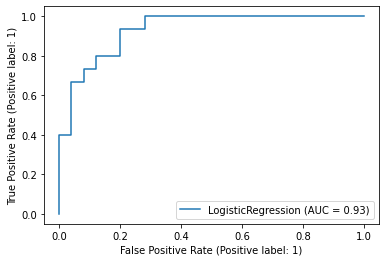

In [46]:
plot_roc_curve(model, X_test, y_test)

### XGBoost

In [47]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[18:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


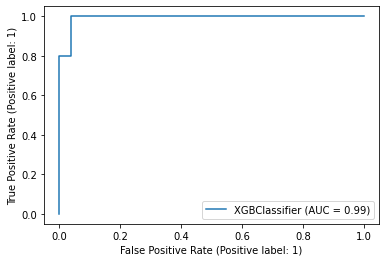

In [48]:
plot_roc_curve(model, X_test, y_test)

### Export data

In [49]:
mirnas = table.columns

In [50]:
mirnas = [m.replace("A", "a").replace("B", "b").replace("P", "p") for m in mirnas]

In [51]:
from Scripts import converters

In [52]:
sequences = converters.canonical_to_seq(mirnas, True)

In [53]:
sequences = np.array(sequences)
mask = sequences != None
norm_log_table = norm_log_table.loc[:, mask]
sequences = sequences[mask]

In [54]:
norm_log_table.columns = sequences
norm_log_table = norm_log_table.loc[:,~norm_log_table.columns.duplicated()]
norm_log_table *= -1
norm_log_table["cancer"] = sick
norm_log_table.head()

,CUAUACGACCUGCUGCCUUUCU,ACUCUUUCCCUGUUGCACUAC,UGCCCUAAAUGCCCCUUCUGGC,CUCUAGAGGGAAGCGCUUUCUG,GAAGUGUGCCGUGGUGUGUCU,AACCAGCACCCCAACUUUGGAC,UGGUGCGGAGAGGGCCCACAGUG,UCUUCUCUGUUUUGGCCAUGUG,CUAUACGGCCUCCUAGCUUUCC,CAUCUUCCAGUACAGUGUUGGA,...,UUCUGGAAUUCUGUGUGAGGGA,UGAGGUAGUAAGUUGUAUUGUU,UGCGGGGCUAGGGCUAACAGCA,UACGUCAUCGUUGUCAUCGUCA,CUCCAGAGGGAUGCACUUUCU,UUAAGACUUGCAGUGAUGUUU,AAUGACACGAUCACUCCCGUUGA,AAAAGCUGGGUUGAGAGGA,GCCCGCGUGUGGAGCCAGGUGU,cancer
427_73,0.693329,0.563049,0.734131,-0.195571,-0.03811,-0.039385,-0.0,0.436123,2.091823,-0.048996,...,1.438820,0.859227,0.357576,0.622200,-0.0,-0.604984,0.511558,1.343828,-0.009485,True
427_203,0.869701,0.256319,0.085215,-0.195571,-0.03811,-0.039385,-0.0,0.311273,-1.561622,-0.259341,...,-0.573687,0.992705,0.241172,0.873890,-0.0,-0.604984,0.502194,1.335776,-0.009485,False
427_6,0.614792,0.330134,0.085739,-0.195571,-0.03811,-0.039385,-0.0,0.161901,1.996926,-0.359341,...,1.048341,1.470424,0.179648,0.945144,-0.0,-0.604984,0.549748,1.917781,-0.009485,False
427_113,-0.918570,-0.165296,-1.387962,-0.195571,-0.03811,-0.039385,-0.0,-0.143295,1.378739,-0.770865,...,1.502310,-3.300877,-0.160081,-0.344803,-0.0,-0.604984,0.156481,1.263248,-0.009485,True
427_204,1.262240,0.981236,1.330402,-0.195571,-0.03811,-0.039385,-0.0,0.528330,2.325854,0.075934,...,-1.810793,1.029020,0.366761,0.837832,-0.0,-0.604984,0.699957,0.985486,-0.009485,False


In [55]:
norm_log_table.to_csv("../TransformedData/Leidinger2016.csv", index=False)